# **Ridge Regression**

**Ridge Regression** is a type of linear regression that adds a regularization term to the model to penalize large coefficients. Unlike ordinary linear regression, which only minimizes the sum of squared errors, Ridge Regression minimizes both the squared errors and a penalty term proportional to the square of the magnitude of the coefficients. This penalty helps reduce model complexity and prevent overfitting.

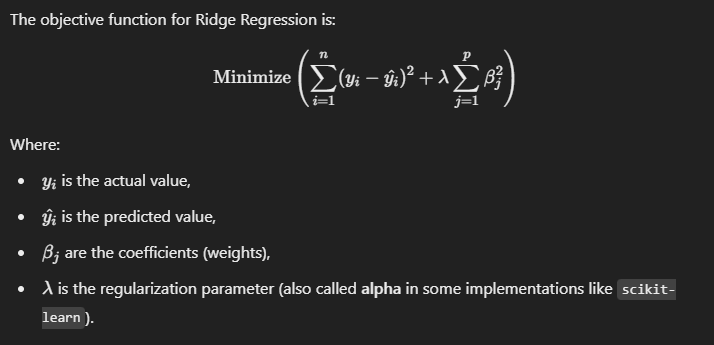

In Ridge Regression, the penalty term is based on the L2 norm (the square of the coefficients), which encourages small but non-zero coefficients. Unlike Lasso, Ridge does not shrink coefficients to zero; rather, it shrinks them towards zero to reduce variance.

### Why is Ridge Regression Important?

- **Multicollinearity Solution**: Ridge Regression is particularly useful when there is multicollinearity (high correlation between independent variables). In such cases, ordinary least squares (OLS) can give unreliable estimates. Ridge stabilizes the regression by adding a penalty that discourages large coefficient values.

- **Overfitting Prevention**: By introducing a regularization term, Ridge Regression controls overfitting, ensuring the model generalizes better to unseen data.

- **Handling High-Dimensional Data**: Ridge works well when the number of features (predictors) is large, especially when the number of features exceeds the number of observations.

- **Interpretability**: While Ridge does not perform feature selection like Lasso, it can still simplify models by shrinking coefficients to smaller values, making the model more interpretable.

### How does Ridge Regression work?

- **Define the objective**: Ridge minimizes the sum of squared errors while adding an L2 penalty (the sum of squared coefficients).

- **Choose regularization parameter (λ)**: The λ controls the amount of regularization. If λ=0, Ridge behaves like standard linear regression. As λ increases, the regularization effect becomes stronger, shrinking the coefficients.

- **Fit the model**: Solving the Ridge Regression objective involves minimizing the cost function, which can be efficiently done using optimization algorithms like gradient descent or closed-form solutions. For Ridge, there is an exact solution:

- **Shrinkage of coefficients**: As λ increases, the model becomes more conservative, shrinking the coefficients to smaller values, but never exactly zero as in Lasso.

- **Prediction**: Once the coefficients are trained, the model can predict outcomes for new data points using the regularized coefficients.

### When should you use Ridge Regression?

- **Multicollinearity**: Ridge is ideal when independent variables are highly correlated. It helps by shrinking coefficients, which reduces the variance that can result from multicollinearity.

- **High-dimensional data**: When the dataset has many predictors (especially when the number of predictors exceeds the number of observations), Ridge is more stable than ordinary least squares regression.

- **When all features are important**: If you believe all the features contribute to the target variable (even to a small degree) and you don’t want to discard any, Ridge is preferred over Lasso, which might zero out some coefficients.
- **Balancing bias and variance**: Ridge strikes a balance between variance (how much your model changes with different training data) and bias (error introduced by approximating a complex model). It controls variance by shrinking coefficients without introducing significant bias.

### Who uses Ridge Regression?

- **Data Scientists and Machine Learning Engineers**: Ridge is a go-to algorithm when building predictive models that need to handle multicollinearity or high-dimensional datasets.

- **Economists and Statisticians**: In fields where datasets often have correlated variables (like economic indicators), Ridge is commonly used to produce more stable and interpretable models.

- **Genomics and Bioinformatics**: Ridge is useful in genomics, where datasets often have a large number of highly correlated predictors (genes), and overfitting is a concern.

### Key Differences Between Ridge and Lasso:

- Ridge shrinks coefficients, but it does not set them to exactly zero, meaning all features remain in the model (though their contributions may be small).

- Lasso, on the other hand, can shrink some coefficients to zero, effectively removing features from the model.

### Key Points to Remember:

- **Regularization**: The key feature of Ridge is that it adds an L2 penalty (squared coefficients) to the loss function. This penalty reduces the model's complexity by shrinking the coefficients.

- **Bias-Variance Tradeoff**: Ridge Regression helps reduce variance (thus improving generalization) at the cost of introducing a small bias.
No Feature Selection: Unlike Lasso, Ridge does not perform feature selection. All features are kept in the model but are shrunk towards zero.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X, y = make_regression(n_samples=100, n_features=4, noise=1, random_state=42 , effective_rank=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [2]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [3]:
y_pred = ridge.predict(X_test)
y_pred

array([  7.13539375,  -8.8002492 ,   8.78912513,   6.09927205,
         5.99994735, -12.30572261, -10.03631065,  -1.04649374,
        23.52913328,   2.55203747,  11.48889191,  -7.61522827,
         0.46017582,  -8.62564635, -29.50846326,  -7.76254477,
         8.06258548,  -7.44014532,  -3.84252421,  25.8910913 ])

In [4]:
mean_absolute_error(y_test, y_pred)

3.0816824025813956

In [5]:
mean_squared_error(y_test, y_pred)

11.330220034384492

In [6]:
r2_score(y_test, y_pred)

0.9276234847540757

In [7]:
param_grid = {
    'alpha': [ 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

ridge_cv = GridSearchCV(ridge, param_grid, cv=3, n_jobs=-1)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [8]:
y_pred2 = ridge_cv.predict(X_test)
y_pred2

array([  7.17119326,  -8.89540639,   8.83622445,   6.17650173,
         6.08043617, -12.40702852, -10.10162896,  -1.07770549,
        23.78518149,   2.57122983,  11.59362725,  -7.71459096,
         0.4722029 ,  -8.69228577, -29.79550622,  -7.85527431,
         8.12657042,  -7.53080381,  -3.87581506,  26.15720314])

In [9]:
mean_absolute_error(y_test, y_pred2)

3.0816824025813956

In [10]:
mean_squared_error(y_test, y_pred2)

11.349061639991897

In [11]:
r2_score(y_test, y_pred2)

0.9275031261245554

In [12]:
ridge_cv.best_estimator_

Ridge(alpha=0.0001)

In [13]:
ridge_cv.best_estimator_.intercept_

0.15121625800403157

In [14]:
ridge_cv.best_estimator_.coef_

array([4.3844567 , 5.0806461 , 7.6664195 , 2.89485579])